In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import random #?

Using TensorFlow backend.


In [2]:
np.random.seed(0)

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data() #Učitava 60 000 slika u train varijable i 10 000 u test podatke. 
#I pridjeljuje im pripadne oznake.

In [4]:
#Prvo vršimo provjeru učitanih podataka tako što pogledamo njihovu količinu i dimenzije.
print(X_train.shape)
print(X_test.shape) # Svaka slika je 28x28 piksela.
print(y_train.shape[0])

(60000, 28, 28)
(10000, 28, 28)
60000


In [5]:
#Assert funkcija pomaže pri verificranju ispravnosti učitanih podatka. S ovime se nastavlja i završava provjera podataka.
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28x28"
assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28x28"

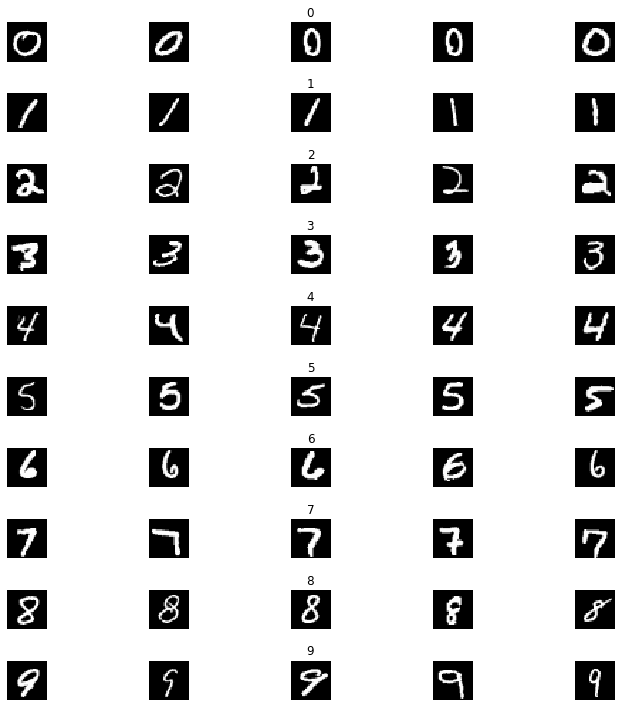

In [6]:
#Sada crtamo i analiziramo podatke
num_of_samples = [] #Prazna lista koja će biti korištena za bilježenje 
 
cols = 5 #Označava pet stupaca od po 10 redova u kojima su brojevi od 0 do 9
num_classes = 10 #Deset klasa, tj. deset različitih brojeva
 
fig, axs = plt.subplots(nrows=num_classes, ncols = cols, figsize=(10, 10)) #Subplot omogućuje crtanje više sika na jednu
#Funkcija sublots vraća dvije vrijednosti koje spremam u varijable fig i axs
#fig kao instanca na sliku a axs osi slike (!?)
#nrows - broj redova mreže koji je jednak broju klasa, tj. 10
#ncols - broj stupaca mreže koji je jednak broju pet; proizvoljno

#figsize - definiramo veličinu slike
#Do ovog dijela ispisuje se samo mreža, bez brojeva u njoj. Brojeve, tj. slike brojeva moramo učitati.

fig.tight_layout() #Ova funkcija sređuje mrežu stupaca i redaka. Da urednje izgleda.

for i in range(cols):
    for j in range(num_classes):
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected - 1)), :, :], cmap=plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j))
            num_of_samples.append(len(x_selected))


[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0, 0.5, 'Number of images')

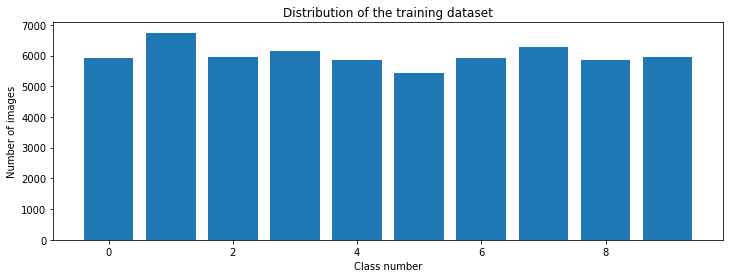

In [7]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")

In [8]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [9]:
X_train = X_train/255 
X_test = X_test/255

In [10]:
num_pixels = 784
X_train = X_train.reshape(X_train.shape[0], num_pixels)
X_test = X_test.reshape(X_test.shape[0], num_pixels)

In [11]:
#Sada slijedi Implementatin II
def create_model():
    model = Sequential()
    model.add(Dense(10, input_dim=num_pixels, activation='relu'))
    model.add(Dense(30, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [12]:
model = create_model()
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_2 (Dense)              (None, 30)                330       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                310       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
Total params: 8,600
Trainable params: 8,600
Non-trainable params: 0
_________________________________________________________________
None


In [13]:
history = model.fit(X_train, y_train, validation_split=0.1, epochs = 10, batch_size = 200, verbose = 1, shuffle = 1) 
#OVDJE SAM IMAO PROBLEM, VIŠE RAZLIČITIH DATOTEKA JE BILO VEZANO ZA ISTI KERNEL. PA SAM OVDJE DOBIVAO DESNE 36, DAKLE 36 SLOJEVA MREŽE.
#ZBOG TOGA SAM DOBIVAO NEKAKVU GREŠKU. PROBLEM JE RIJEŠEN RESTARTIRANJEM KERNELA.

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 1s 15us/step - loss: 0.6347 - accuracy: 0.8045 - val_loss: 0.3159 - val_accuracy: 0.9065
Epoch 2/10
54000/54000 [==============================] - 1s 13us/step - loss: 0.3823 - accuracy: 0.8909 - val_loss: 0.2845 - val_accuracy: 0.9177
Epoch 3/10
54000/54000 [==============================] - 1s 13us/step - loss: 0.3399 - accuracy: 0.9009 - val_loss: 0.2789 - val_accuracy: 0.9150
Epoch 4/10
54000/54000 [==============================] - 1s 13us/step - loss: 0.3267 - accuracy: 0.9042 - val_loss: 0.2758 - val_accuracy: 0.9147
Epoch 5/10
54000/54000 [==============================] - 1s 13us/step - loss: 0.3148 - accuracy: 0.9071 - val_loss: 0.2881 - val_accuracy: 0.9098
Epoch 6/10
54000/54000 [==============================] - 1s 13us/step - loss: 0.3046 - accuracy: 0.9096 - val_loss: 0.2509 - val_accuracy: 0.9215
Epoch 7/10
54000/54000 [==============================] - 1s 12us/ste

Text(0.5, 0, 'epoch')

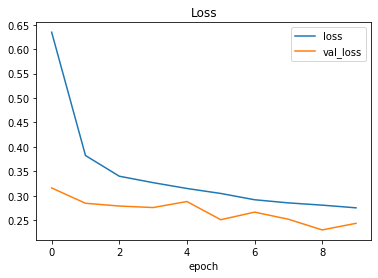

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

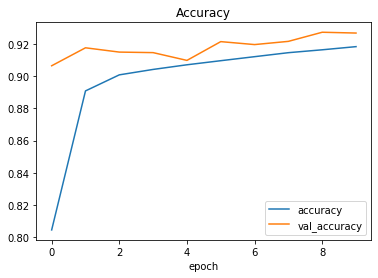

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [16]:
score = model.evaluate(X_test, y_test, verbose=0)
print(type(score))
print('Test score:', score[0])
print('Test accuracy:', score[1])


<class 'list'>
Test score: 0.29590836600214243
Test accuracy: 0.9143000245094299


In [17]:
def create_model():
    model = Sequential()
    model.add(Dense(10, input_dim=num_pixels, activation='relu'))
    model.add(Dense(30, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [18]:
model = create_model()
print(model.summary())
#Pogledaj ispod, izbacuje mi "denske 5, 6, 7..." - jel to znači da zapravo nadograđujem ovu mrežu koju sam prije kreirao?
#Zašto njemu piše "dense 1, 2, 3". Ako da, zašto ih onda ne ispiše svee, od 1 do 8?

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_6 (Dense)              (None, 30)                330       
_________________________________________________________________
dense_7 (Dense)              (None, 10)                310       
_________________________________________________________________
dense_8 (Dense)              (None, 10)                110       
Total params: 8,600
Trainable params: 8,600
Non-trainable params: 0
_________________________________________________________________
None


In [19]:
history = model.fit(X_train, y_train, validation_split=0.1, epochs = 10, batch_size = 200, verbose = 1, shuffle = 1)
#X_train - trening podaci na temelju kojih ćemo dobiti parametre mreže
#y_train - oznake trening podataka
#validation_split = 0.1 - označava da 10% podataka koristimo za valdiaciju
#Ostalo mi je poznato
 

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 1s 14us/step - loss: 0.5706 - accuracy: 0.8180 - val_loss: 0.3138 - val_accuracy: 0.9078
Epoch 2/10
54000/54000 [==============================] - 1s 13us/step - loss: 0.3113 - accuracy: 0.9083 - val_loss: 0.2329 - val_accuracy: 0.9260
Epoch 3/10
54000/54000 [==============================] - 1s 13us/step - loss: 0.2707 - accuracy: 0.9204 - val_loss: 0.2613 - val_accuracy: 0.9195
Epoch 4/10
54000/54000 [==============================] - 1s 13us/step - loss: 0.2509 - accuracy: 0.9249 - val_loss: 0.2092 - val_accuracy: 0.9412
Epoch 5/10
54000/54000 [==============================] - 1s 13us/step - loss: 0.2369 - accuracy: 0.9288 - val_loss: 0.2032 - val_accuracy: 0.9405
Epoch 6/10
54000/54000 [==============================] - 1s 13us/step - loss: 0.2272 - accuracy: 0.9323 - val_loss: 0.2274 - val_accuracy: 0.9332
Epoch 7/10
54000/54000 [==============================] - 1s 13us/ste

Text(0.5, 0, 'epoch')

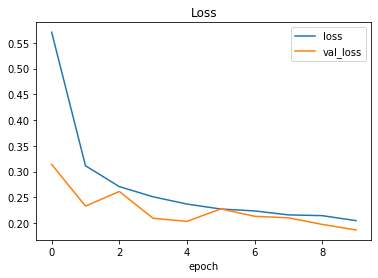

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')
#Kada mi trening loss postane manje od val_loss, tada mi model postaje "overfitted"

Text(0.5, 0, 'epoch')

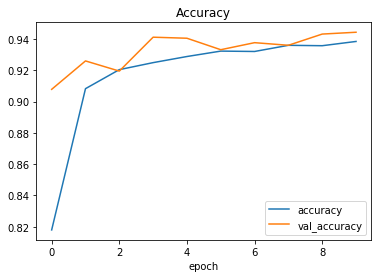

In [21]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [22]:
#Evaluacija modela
score = model.evaluate(X_test, y_test, verbose=0)
print(type(score))
print('Test score:', score[0])
print('Test accuracy:', score[1])

<class 'list'>
Test score: 0.21512949201166628
Test accuracy: 0.9363999962806702


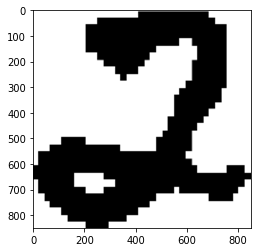

In [23]:
import requests
from PIL import Image #Python imaging library

url = 'https://www.researchgate.net/profile/Jose_Sempere/publication/221258631/figure/fig1/AS:305526891139075@1449854695342/Handwritten-digit-2.png'
response = requests.get(url, stream=True)
img = Image.open(response.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))



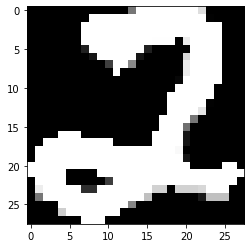

In [24]:
#Trebamo osigurati da ova slika korespondira s onim što UNM treba učiti. Dakle, treba imati oblik 28x8 pixela
#Da bi modificirali ovu sliku, moramo joj pristupiti kao numpy arrayu

import cv2
 
img = np.asarray(img) #Konvertira ulazne podatke u array
img = cv2.resize(img, (28, 28)) #Mijenjamo veličinu slike
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #Pretvaramo je u crno-bijelu sliku
img = cv2.bitwise_not(img) #Pretvaramo sve nule u 255 i obrnuto. Tako da dobijemo bijli broj na crnoj podlozi - kao i kod prijašnih brojeva.
plt.imshow(img, cmap=plt.get_cmap('gray'))

In [25]:
img = img/255 #Normaliziram sliku
img = img.reshape(1, 784) #Pretvaram je u jedan red podataka od 784 pixela

In [26]:
prediction = model.predict_classes(img) #predict(self, x, batch_size=32, verbose=0)
#Generates output predictions for the input samples, processing the samples in a batched way.
print("predicted digit:", str(prediction))

predicted digit: [2]


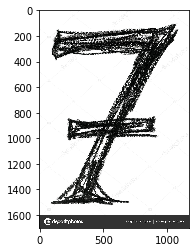

In [27]:
import requests
from PIL import Image #Python imaging library

url = 'https://st3.depositphotos.com/1421381/15015/i/1600/depositphotos_150157420-stock-photo-handwritten-sketch-black-number-7.jpg'
response = requests.get(url, stream=True)
img2 = Image.open(response.raw)
plt.imshow(img2, cmap=plt.get_cmap('gray'))

In [28]:
img2 = img2/255 #Normaliziram sliku
img2 = img2.reshape(1, 784) #Pretvaram je u jedan red podataka od 784 pixela

TypeError: unsupported operand type(s) for /: 'JpegImageFile' and 'int'